# Setting your working directory

In [1]:
YOUR_FOLDER_DIRECTORY = '/Users/antoine/Documents/GitHub/Allocation_de_portefeuille_sous_contrainte_ESG'

# Packages

In [2]:
import numpy as np

# import Portfolio class
import sys
sys.path.append(YOUR_FOLDER_DIRECTORY)
from src.portfolio_class import Portfolio

# Define and dowload the portfolio

In [3]:
TICKERS = ['JPM', 'BP', 'AAPL','JNJ','MSFT','PG','V','HD','GE','PFE']
START_DATE = '2020-01-01'
END_DATE = '2023-12-01'
INTERVAL = '1mo' # '1d', '1y'
# Sustainalytics scores of the stocks (the smaller the better)
SUSTAINALYTICS_SCORES = [17.2, 34.6, 29.3, 24, 15, 29, 17, 13, 41, 25]

In [4]:
PORTFOLIO = Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      SUSTAINALYTICS_SCORES)

In [5]:
PORTFOLIO.download_data()

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed


# ESG constraint impact on portefolio sector repartition

In [6]:
# Maximum ESG score constraints
MAX_ESG_SCORE = 25
# propostion of risk-free asset in the portfolio
ALPHA = 0.9
# risk-free rate
RISK_FREE_RATE = 1
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter

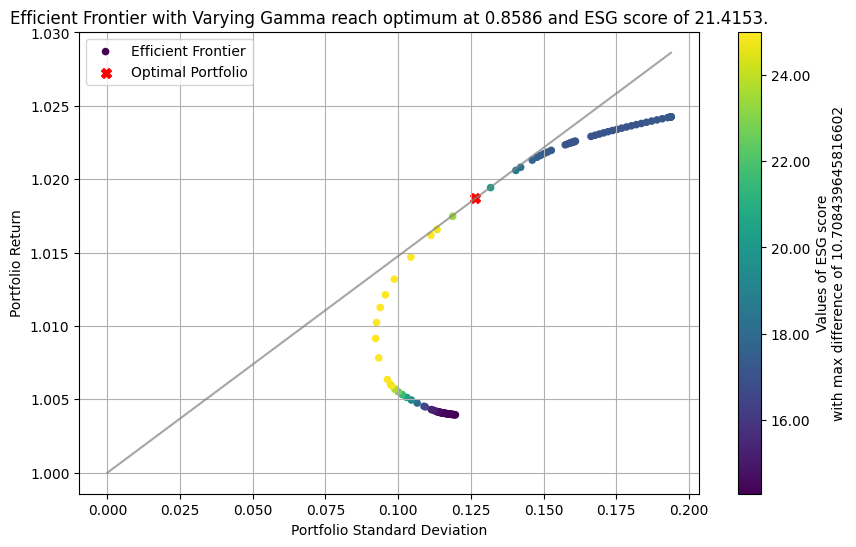

In [7]:
PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  ALPHA,
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)


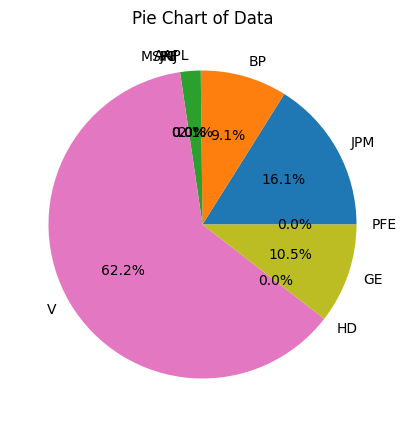

In [8]:
import matplotlib.pyplot as plt

data = PORTFOLIO.weights_tangente_portfolio

labels = TICKERS

plt.figure(figsize=(5, 5))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart of Data')
plt.show()


# suite multi

In [9]:
# Maximums ESG score constraints
MAX_ESG_SCORES = list(np.linspace(np.min(SUSTAINALYTICS_SCORES), np.max(SUSTAINALYTICS_SCORES), 15))
# propostion of risk-free asset in the portfolio
ALPHA = 0.9
# risk-free rate
RISK_FREE_RATE = 1
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


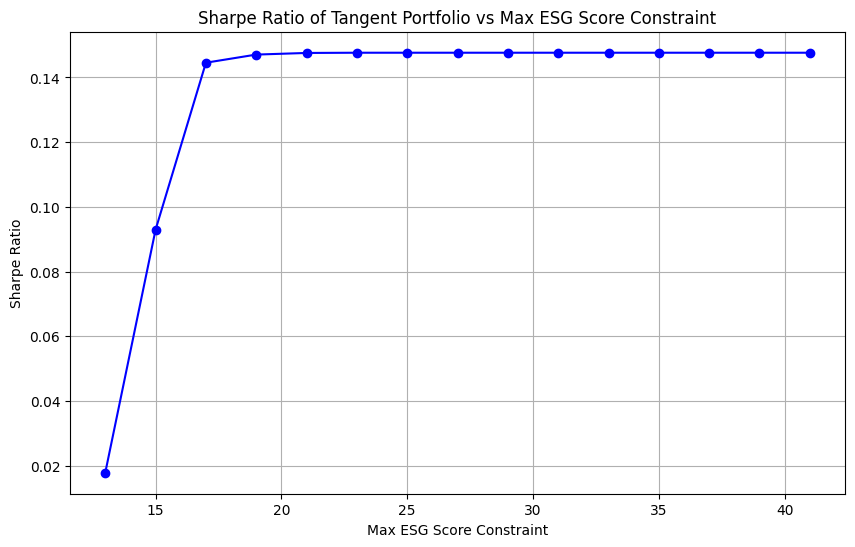

In [10]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        ALPHA,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True)

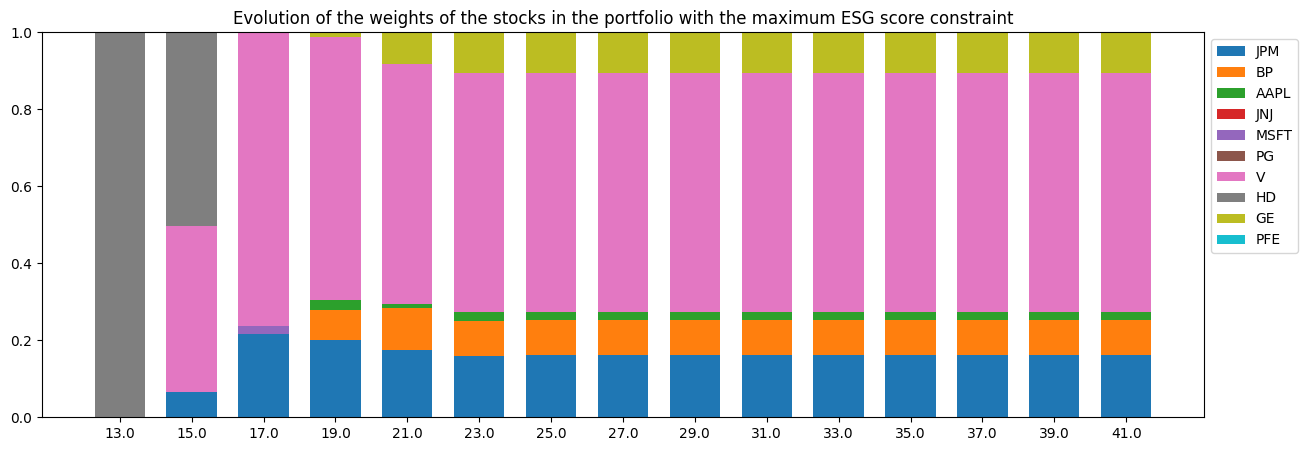

In [11]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 ALPHA,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True)

In [23]:
PORTFOLIO.get_efficient_frontier_data_multiple_max_esg_scores(GAMMA_VALUES,
                                        ALPHA,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True)

In [26]:
array_lol = [PORTFOLIO.multiple_esg_simulations[max_score]['weights_tangent'] for max_score in MAX_ESG_SCORES]

In [33]:
dict_lol = {ticker: np.array(array_lol)[:, i] for i, ticker in enumerate(PORTFOLIO.ticker_sector_dict)}

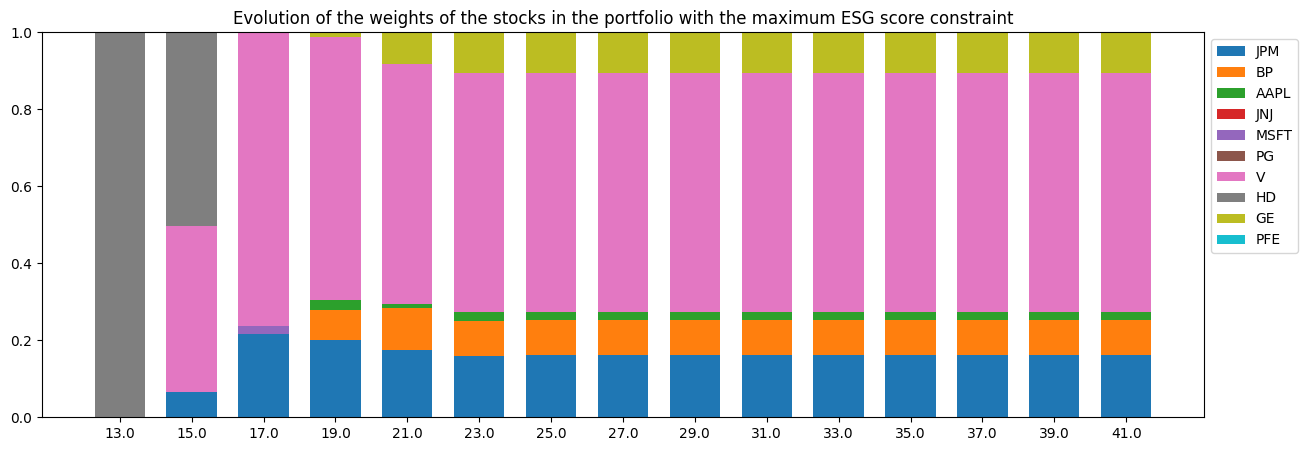

In [52]:
weights_evolution_with_max_score = [PORTFOLIO.multiple_esg_simulations[max_score]['weights_tangent'] for max_score in MAX_ESG_SCORES]

dict_weights_evolution = {ticker: np.array(weights_evolution_with_max_score)[:, i] for i, ticker in enumerate(PORTFOLIO.ticker_sector_dict)}

width = 0.7

fig, ax = plt.subplots(figsize=(15, 5))
bottom = np.zeros(len(MAX_ESG_SCORES))

for boolean, weight in dict_lol.items():
    p = ax.bar(np.arange(len(MAX_ESG_SCORES)), weight, width, label=boolean, bottom=bottom)
    bottom += weight

ax.set_title("Evolution of the weights of the stocks in the portfolio with the maximum ESG score constraint")
ax.set_xticks(np.arange(len(MAX_ESG_SCORES)))  
ax.set_xticklabels(MAX_ESG_SCORES)  
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  

plt.show()

In [6]:
PORTFOLIO.ticker_sector_dict

{'JPM': 'Financial Services',
 'BP': 'Energy',
 'AAPL': 'Technology',
 'JNJ': 'Healthcare',
 'MSFT': 'Technology',
 'PG': 'Consumer Defensive',
 'V': 'Financial Services',
 'HD': 'Consumer Cyclical',
 'GE': 'Industrials',
 'PFE': 'Healthcare'}